In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

In [3]:
data = pd.read_csv('50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
data.shape

(50, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,NaN,NaN,NaN,73721.6156,45902.256482,0.0,39936.37,73051.08,101602.8,165349.2
Administration,50.0,NaN,NaN,NaN,121344.6396,28017.802755,51283.14,103730.875,122699.795,144842.18,182645.56
Marketing Spend,50.0,NaN,NaN,NaN,211025.0978,122290.310726,0.0,129300.1325,212716.24,299469.085,471784.1
State,50,3,California,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Profit,50.0,NaN,NaN,NaN,112012.6392,40306.180338,14681.4,90138.9025,107978.19,139765.9775,192261.83


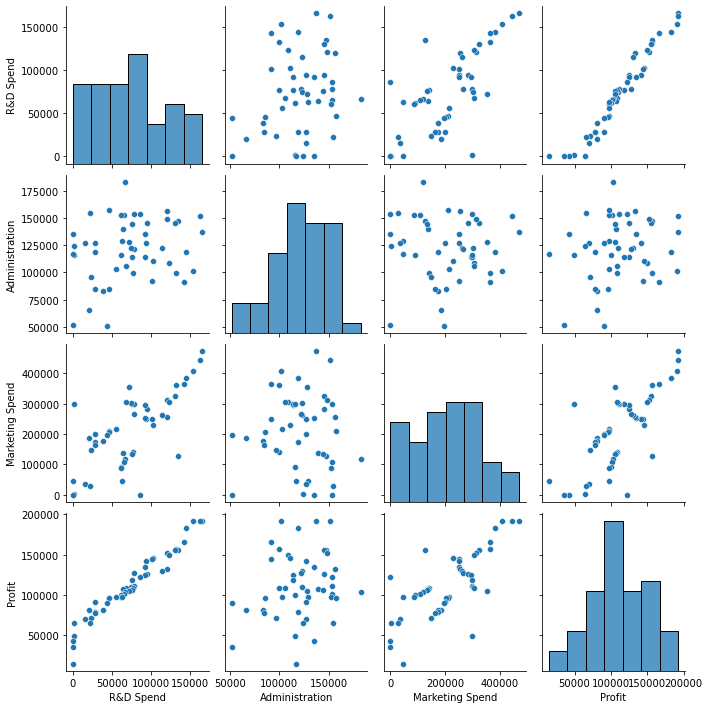

In [26]:
sns.pairplot(data)
plt.show()

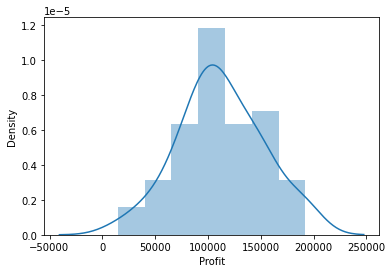

In [30]:
sns.distplot(data.Profit)
plt.show()

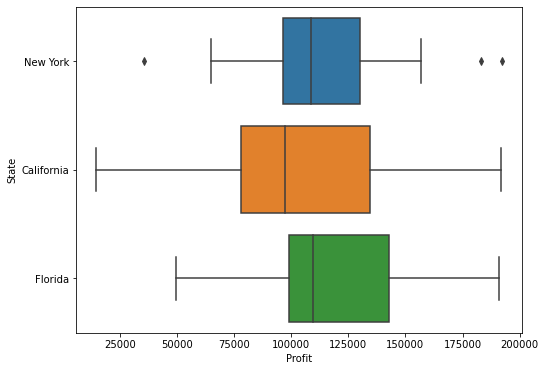

In [34]:
plt.figure(figsize = (8,6))
sns.boxplot('Profit', 'State', data = data)
plt.show()

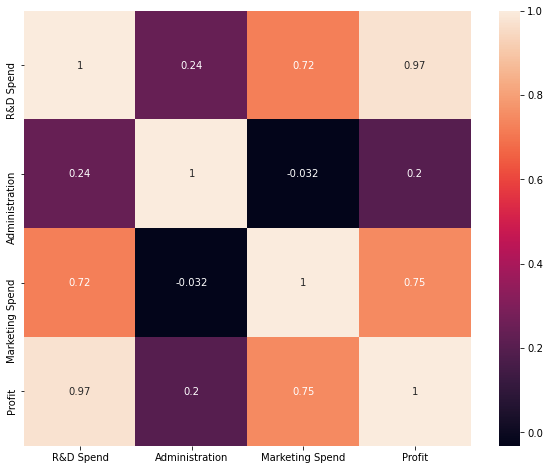

In [194]:
plt.figure(figsize = (10,8))
sns.heatmap(data.corr(), annot = True)
plt.show()

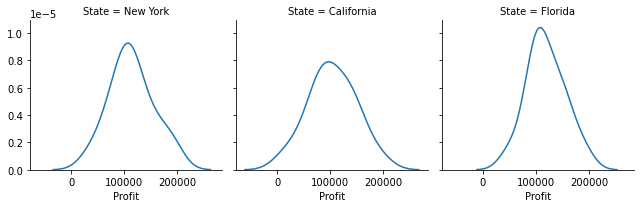

In [40]:
# spread of profit against state
g = sns.FacetGrid(data, col = 'State')
g.map(sns.kdeplot, 'Profit')
plt.show()

In [165]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X.shape, y.shape

((50, 4), (50,))

In [166]:
#Encoding categorical variables
labelencoder = LabelEncoder()
X.State = labelencoder.fit_transform(X.State)

In [167]:
ohe = OneHotEncoder(sparse = False, handle_unknown='error', drop = 'first')
state = pd.DataFrame(ohe.fit_transform(X[['State']]))
df = X.join(state)

In [168]:
df.shape, y.shape

((50, 6), (50,))

In [171]:
X_train, X_test, y_train, y_test = train_test_split(df,y,test_size = 0.2, random_state=0)

### Linear Regression

In [195]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred

array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230165,  67851.69209676,  98791.73374687,
       113969.43533012, 167921.0656955 ])

In [186]:
regressor.score(X_train, y_train)

0.9501847627493606

In [198]:
r2_score(y_test.values, y_pred)

0.9347068473282424